### Answer 1
> The first figure is the spectogram plot of the wave file

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

y, sr = librosa.load('q1.wav')
frame_size = 200 * sr // 1000 # frame of 200 ms
# y=y[1000:1000+frame_size]

In [4]:
D = librosa.stft(y)
D.shape

(1025, 45)

/home/masterg/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


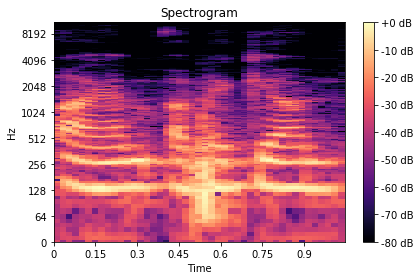

In [5]:
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

(129, 171)
(129,)
(171,)


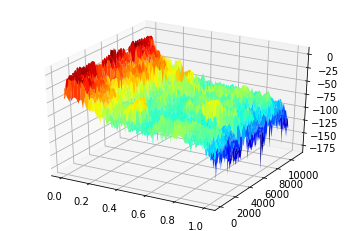

In [27]:
Sxx, f, t = mlab.specgram(y)
print(Sxx.shape)
print(f.shape)
print(t.shape)


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(f[:, None], t[None, :], 10.0*np.log10(Sxx), cmap=cm.jet)
plt.show()

### Answer 2

Text(0.5, 1.0, 'time signal')

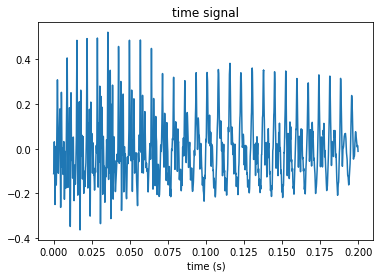

In [7]:
signal = y[1000:1000+frame_size]
time_vector = np.arange(frame_size) / sr
fig, ax = plt.subplots()
ax.plot(time_vector, signal)
ax.set_xlabel('time (s)')
ax.set_title('time signal')

Text(0.5, 1.0, 'Fourier spectrum')

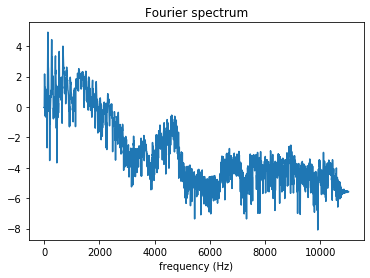

In [8]:
windowed_signal = np.hamming(frame_size) * signal
dt = 1/sr
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(windowed_signal)
log_X = np.log(np.abs(X))

fig, ax = plt.subplots()
ax.plot(freq_vector, log_X)
ax.set_xlabel('frequency (Hz)')
ax.set_title('Fourier spectrum')

Text(0.5, 1.0, 'cepstrum')

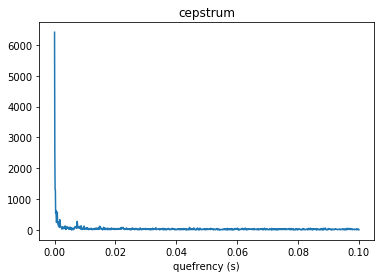

In [9]:
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots()
ax.plot(quefrency_vector, np.abs(cepstrum))
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')

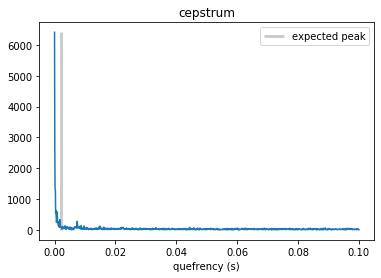

In [10]:
fig, ax = plt.subplots()
ax.vlines(1/440, 0, np.max(np.abs(cepstrum)), alpha=.2, lw=3, label='expected peak')
ax.plot(quefrency_vector, np.abs(cepstrum))
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')
ax.legend()

In [11]:
def compute_cepstrum(signal, sample_freq):
    """Computes cepstrum."""
    frame_size = signal.size
    windowed_signal = np.hamming(frame_size) * signal
    dt = 1/sample_freq
    freq_vector = np.fft.rfftfreq(frame_size, d=dt)
    X = np.fft.rfft(windowed_signal)
    log_X = np.log(np.abs(X))
    cepstrum = np.fft.rfft(log_X)
    df = freq_vector[1] - freq_vector[0]
    quefrency_vector = np.fft.rfftfreq(log_X.size, df)
    return quefrency_vector, cepstrum

def cepstrum_f0_detection(signal, sample_freq, fmin=82, fmax=640):
    """Returns f0 based on cepstral processing."""
    quefrency_vector, cepstrum = compute_cepstrum(signal, sample_freq)
    # extract peak in cepstrum in valid region
    valid = (quefrency_vector > 1/fmax) & (quefrency_vector <= 1/fmin)
    max_quefrency_index = np.argmax(np.abs(cepstrum)[valid])
    f0 = 1/quefrency_vector[valid][max_quefrency_index]
    return f0

In [12]:
cepstrum_f0_detection(signal, sr)

580.5263157894736

### Answer 3


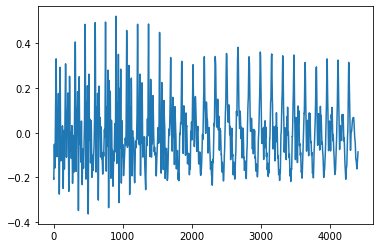

/home/masterg/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


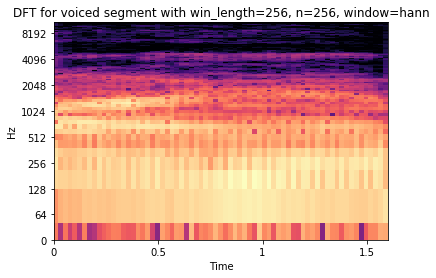

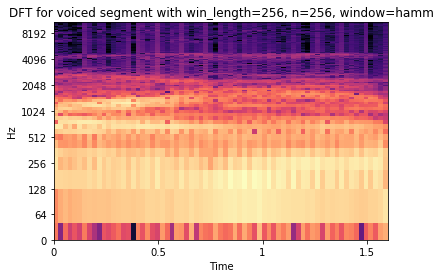

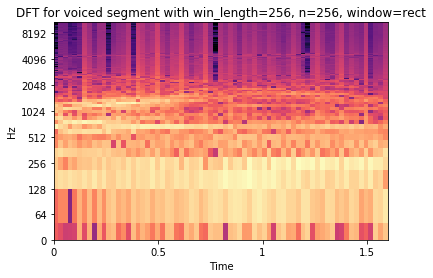

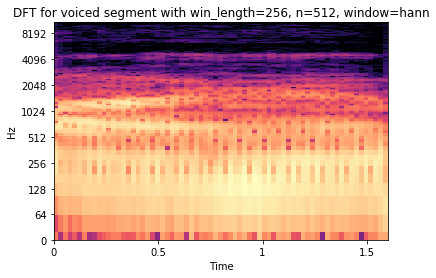

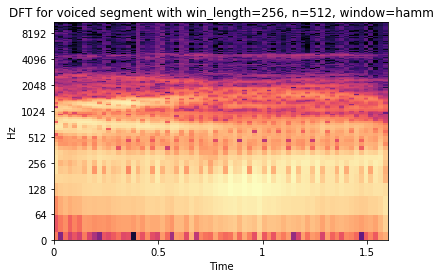

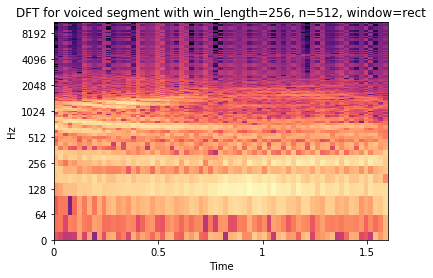

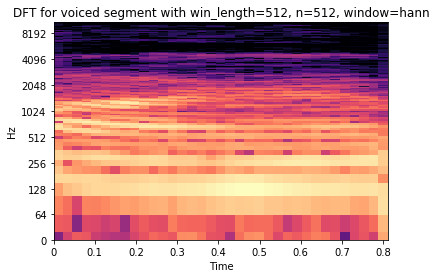

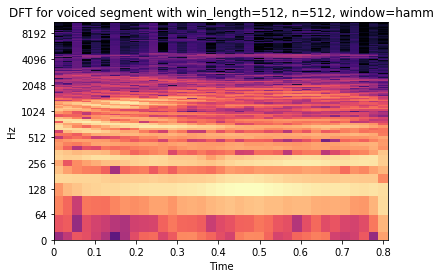

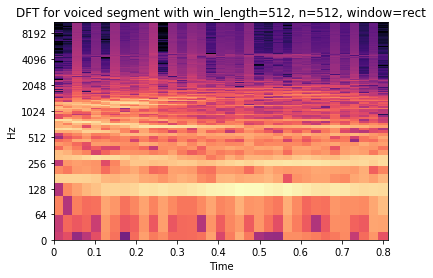

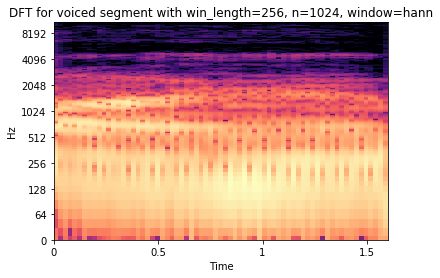

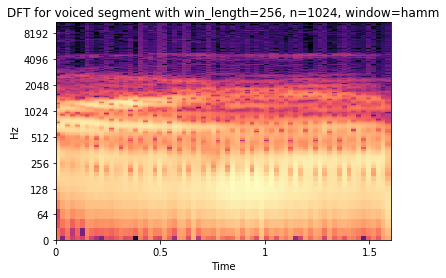

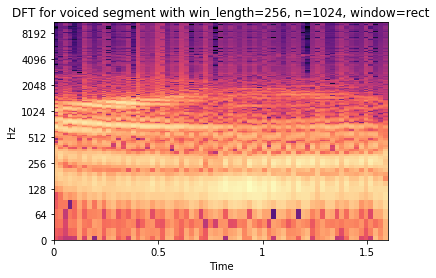

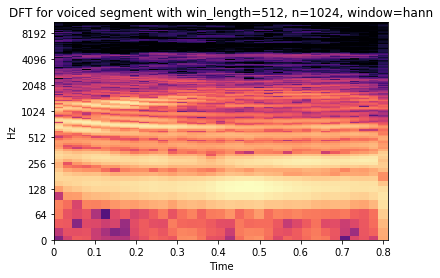

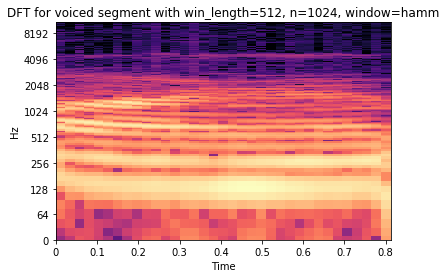

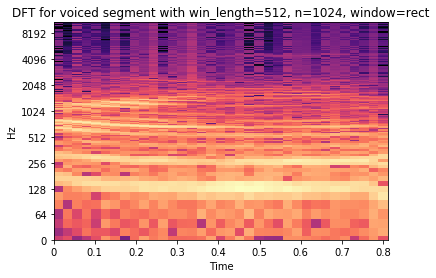

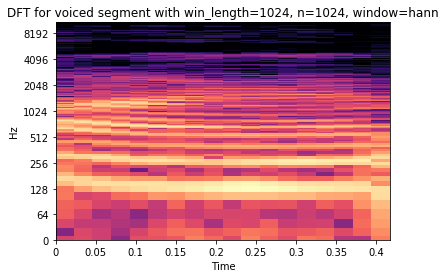

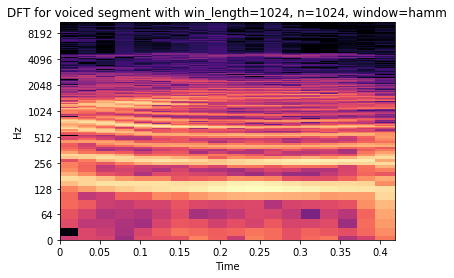

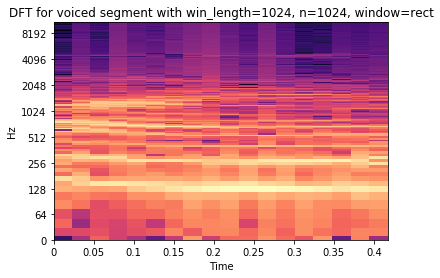

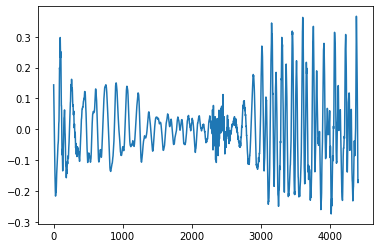

/home/masterg/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


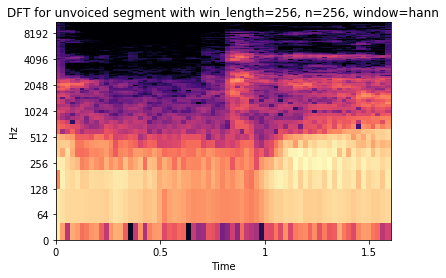

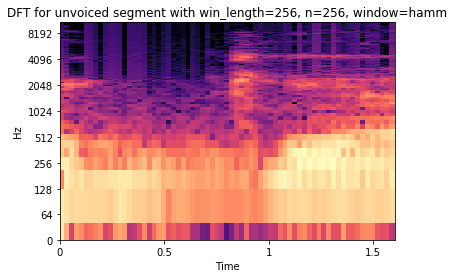

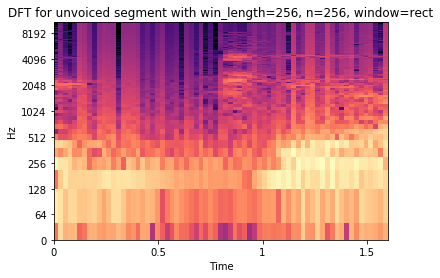

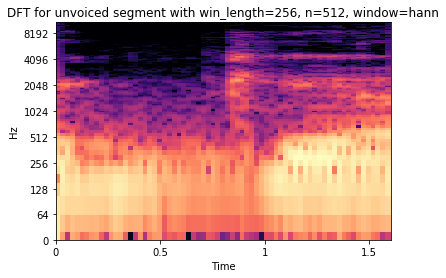

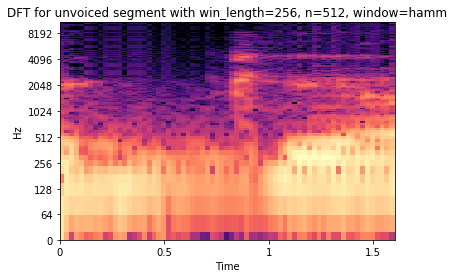

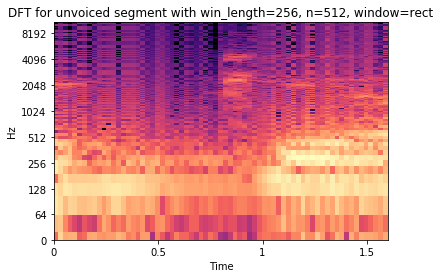

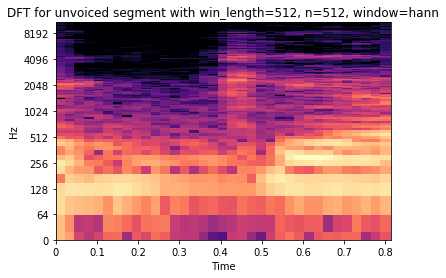

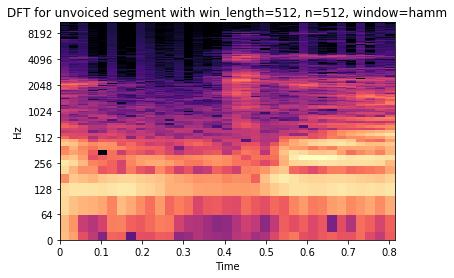

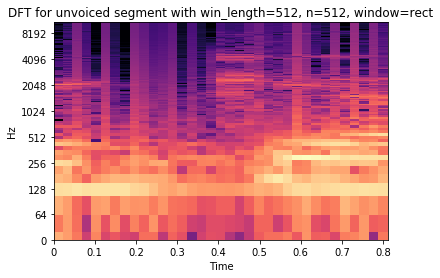

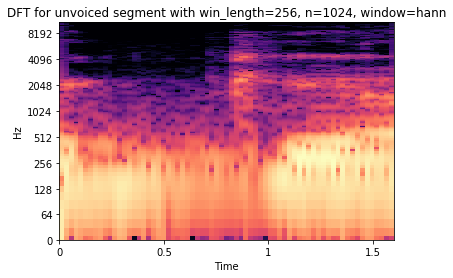

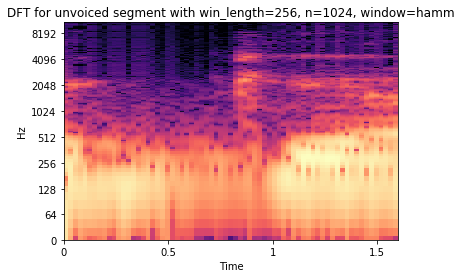

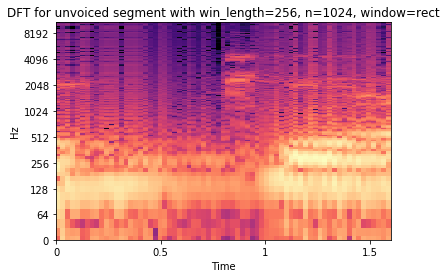

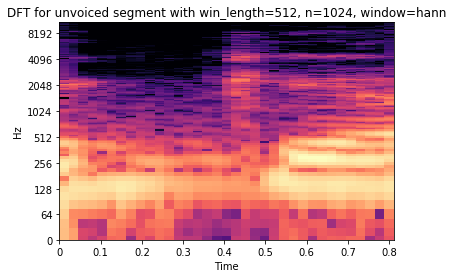

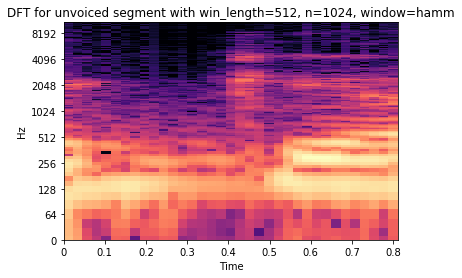

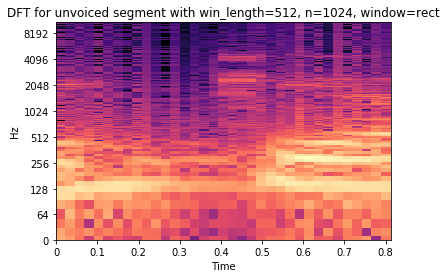

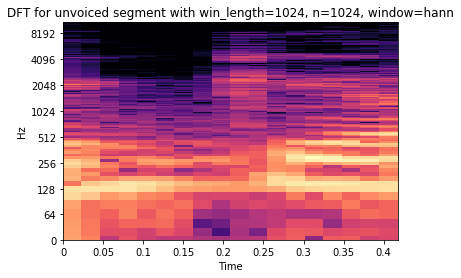

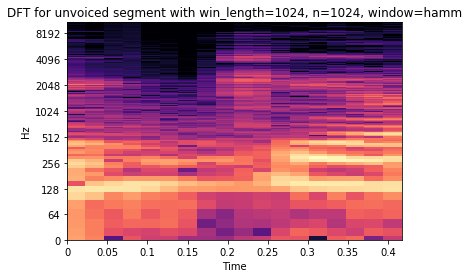

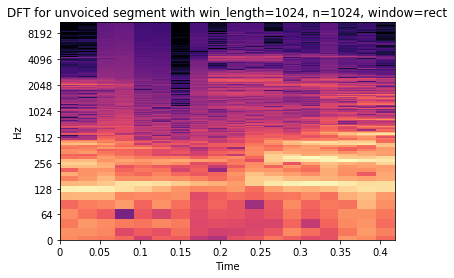

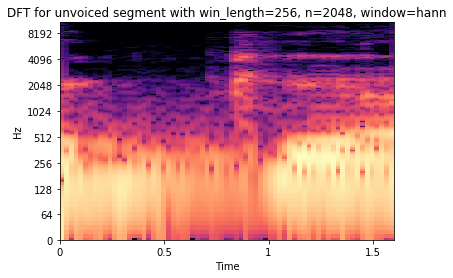

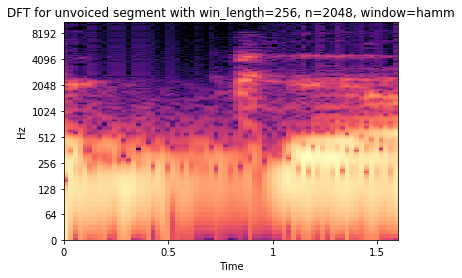

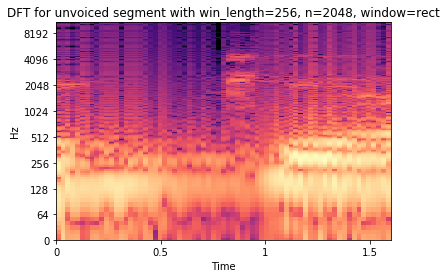

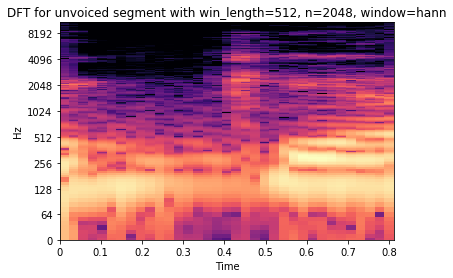

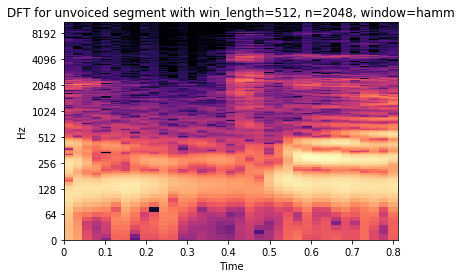

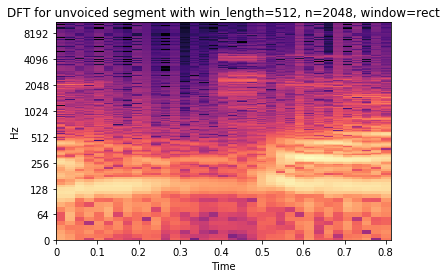

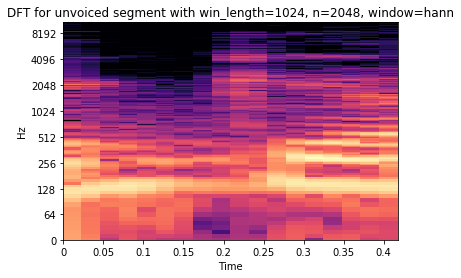

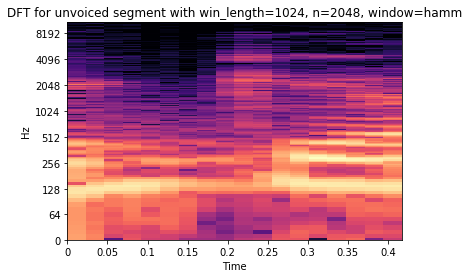

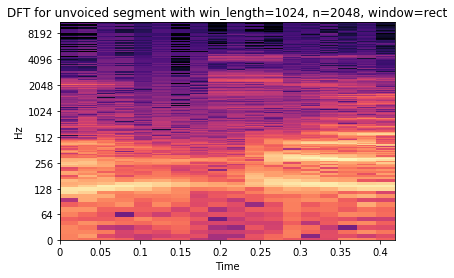

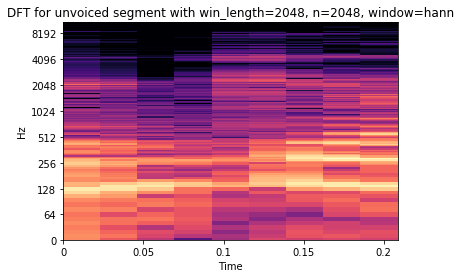

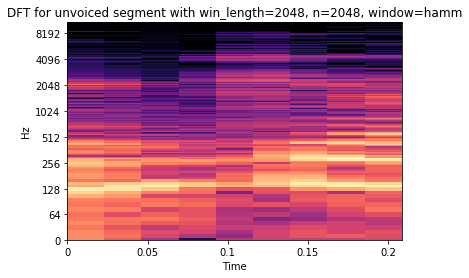

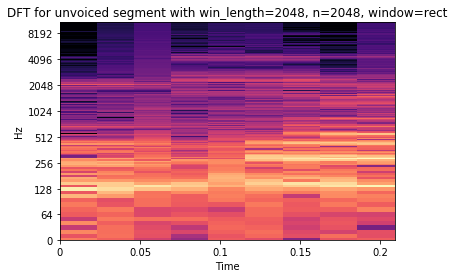

In [13]:
y,sr = librosa.load('q1.wav')
y = y[40*sr//1000:40*sr//1000+frame_size]
plt.plot(y)
plt.show()
for n_fft in [256,512,1024]:
    for win_length in [256,512,1024]:
        if n_fft<win_length:
            continue        
        for window in ['hann','hamm','rect']:
            d = librosa.core.stft(y, n_fft = n_fft, window=window, win_length = win_length)
            librosa.display.specshow(librosa.amplitude_to_db(d,ref=np.max),y_axis='log', x_axis='time')
            plt.title("DFT for voiced segment with win_length={win_length}, n={n_fft}, window={window}".format(win_length=win_length,n_fft=n_fft,window=window))
            plt.show()

y,sr = librosa.load('q1.wav')
y = y[600*sr//1000:600*sr//1000+frame_size]
plt.plot(y)
plt.show()
for n_fft in [256,512,1024,2048]:
    for win_length in [256,512,1024,2048]:
        if n_fft<win_length:
            continue        
        for window in ['hann','hamm','rect']:
            d = librosa.core.stft(y, n_fft = n_fft, window=window, win_length = win_length)
            librosa.display.specshow(librosa.amplitude_to_db(d,ref=np.max),y_axis='log', x_axis='time')
            plt.title("DFT for unvoiced segment with win_length={win_length}, n={n_fft}, window={window}".format(win_length=win_length,n_fft=n_fft,window=window))
            plt.show()

#### Comment
- As we increase the n values, the visual resolution of the spectogram increases as the number of points increases
- Hanning window seems to have the best resolution of all window selections 

### Answer 4

In [40]:
import python_speech_features
y,sr = librosa.load('q1.wav')
mfccs = python_speech_features.base.mfcc(y,samplerate=sr,winlen=0.02,winstep=0.02)
np.savetxt('q4.txt',mfccs)
print(mfccs.shape)

(52, 13)


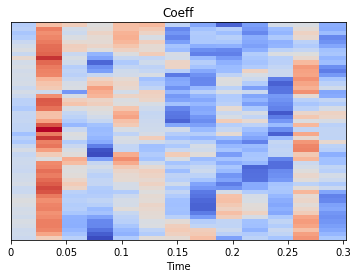

In [41]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
plt.title("Coeff")
librosa.display.specshow(mfccs, x_axis='time')

/home/masterg/anaconda3/lib/python3.7/site-packages/librosa/display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


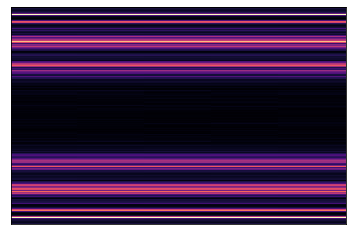

In [42]:
y = y[0:(len(y)//frame_size)*frame_size]
frames = np.split(y,frame_size)
librosa.display.specshow(np.fft.fft(frames,n=512,axis=0))
plt.show()


#### Comment
-  The Mel-frequency cepstral coefficients concisely describe the overall shape of a spectral envelope.
- MFCC are suitable for speech recognition tasks.